# On Linear Regression

## 1. Linear Regression is a Least Squares Problem

**Linear regression** is a method to model the relationship between a dependent variable and one or more independent variables using a straight line. It's widely used in various fields.

In this post, we'll walk through **linear regression**, show how it's connected to the **least squares problem**, and explain how we can find the best linear model by minimizing the **Sum of Squared Errors**.

Let's start by considering a simple linear relationship. Imagine we have a dataset where the relationship between $x$ and $y$ follows this equation:
$$
y = 1 + 2 x
$$

To visualize this relationship, we plot a few points.

Text(0, 0.5, 'y')

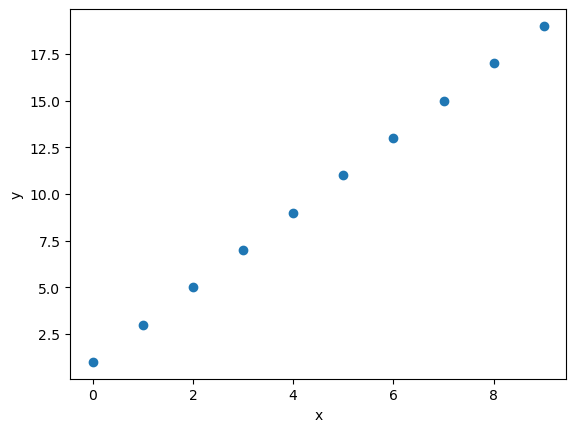

In [3]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0, 10, 1)
y = 1 + 2*x

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

In real-world scenarios, we typically don't know the exact relationship. Instead, we are given data points, and the goal is to find the best line that fits this data. 

Let's take a look at our data:

In [4]:
# x and y coordinates
for a, b in zip(x, y):
    print(f"({a}, {b})")

(0, 1)
(1, 3)
(2, 5)
(3, 7)
(4, 9)
(5, 11)
(6, 13)
(7, 15)
(8, 17)
(9, 19)


Linear regression helps us to find the weights $w_0$ and $w_1$ in the linear equation $y=w_0 + w_1 x$. These weights define the relationship between $x$ and $y$. 

However, normally we don't know $w_0$ and $w_1$ a-priori. So how do we find out? 

Let's take a random guess. The function below takes in a guess for the weights $w_0$ and $w_1$ and returns y.

In [5]:
def predict_y(w_0, w_1):
    y = w_0 + w_1 * x
    return y

Let's guess that $w_0=8$ and $w_1=-1$:

$$
\hat y = 8 - 1 x
$$

*Note that we will denote our prediction for $y$ by a hat symbol: $\hat y$.*

This relationship is visualized below by the red line.

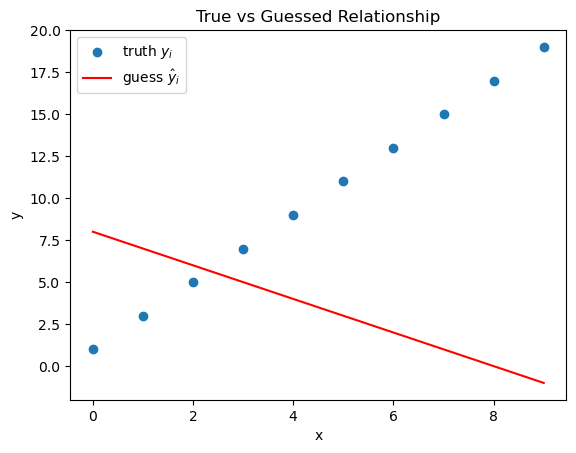

In [6]:
y_hat = predict_y(8, -1)

plt.scatter(x, y, label="truth $y_i$")
plt.plot(x, y_hat, label="guess $\hat y_i$", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("True vs Guessed Relationship");

Our guess is far off from the truth. How can we quantify how far off it is? This is where **residuals** come in. A **residual** is the difference between the true value of $y$ and the predicted value $\hat{y}$. For each data point, we can compute the residual as:
$$
{residual}_{i} = y_i - \hat y_i
$$

Let's calculate the residuals and visualize them:

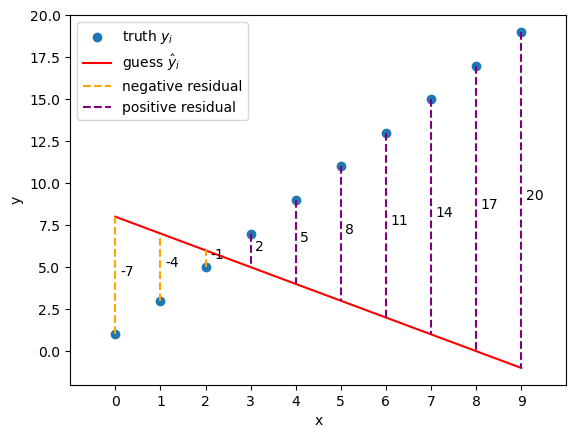

In [7]:
# Calculate the residuals
residuals = y - y_hat

# Visualize the residuals
plt.scatter(x, y, label="truth $y_i$")
plt.plot(x, y_hat, label="guess $\hat y_i$", color="red")
for i, _ in enumerate(y):
    color = "orange" if residuals[i] < 0 else "purple"
    label = "negative residual" if i==0 else ("positive residual" if i==len(y)-1 else None)
    plt.plot((x[i], x[i]), (y[i], y_hat[i]), linestyle="--", color=color, label=label)
    plt.text(x[i] + 0.1, y[i] - residuals[i]/2, s=round(residuals[i], 1))
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(x);
plt.xlim((-1, 10));

The dashed lines in the plot represent the **residuals** for each data point, and the numbers next to them indicate the size of the residual. Negative residuals (yellow) show that the predicted value is greater than the actual value, while positive residuals (purple) indicate the opposite.

Our goal is to minimize the residuals to find the best fitting line. But how can we achieve that?

One approach could be to calculate the sum of the residuals for the m data points we have and find $w_0$ and $w_1$ that minimize this sum:

$$
\sum_i^m {(y_i - \hat y_i)} = \sum_i^m({y_i - (w_0 + w_1 x_i))}
$$

However, as shown in the plot above, some residuals are positive, while others are negative. If we simply sum them, the positive and negative residuals could cancel each other out, misleading us into thinking we have a good fit when we don't. To avoid this, we **square the residuals** before summing them:

$$
J(\mathbf{w}) = \sum_i^m{(y_i - \hat y_i)^2} = \sum_i^m{(y_i - (w_0 + w_1 x_i))^2}
$$

We will use $J$ to represent the sum of the squared residuals (more commonly referred to as sum of squared errors or SSE). This is also known as the **cost function** or **loss function** or **objective function**.

Let's visualize $J$:

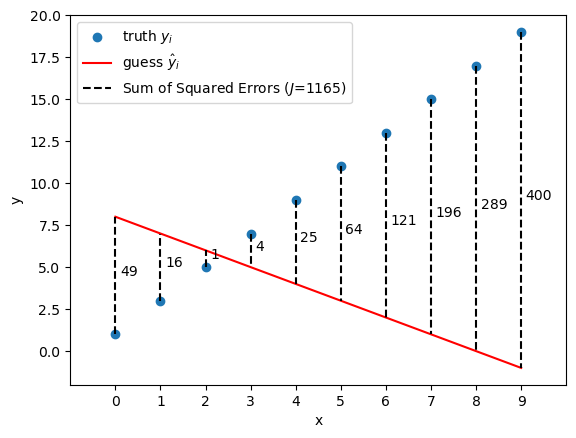

In [8]:
def plot_model(x, y, y_hat):
    residuals = (y - y_hat)
    
    plt.scatter(x, y, label="truth $y_i$")
    plt.plot(x, y_hat, label="guess $\hat y_i$", color="red")
    for i, _ in enumerate(y):
        plt.plot((x[i], x[i]), (y[i], y_hat[i]), linestyle="--", color="black", label=f"Sum of Squared Errors ($J$={round((residuals**2).sum(), 1)})" if i==0 else None)
        plt.text(x[i] + 0.1, y[i] - 0.5 * residuals[i], s=round(residuals[i]**2, 1))
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xticks(x)
    plt.xlim((-1, 10))

plot_model(x, y, y_hat)


Squaring ensures that any deviation between our predictions and the actual values, whether positive or negative, is penalized. Additionally, squaring the residuals gives us a **differentiable function**, allowing for a **closed-form solution** to this **Least Squares Problem**, which we will explore shortly.

## 2. Solving the Least Squares Problem

Let's now find a way to determine the weights to come up with a prediction $\hat y$ which minimizes the **SSE**. First, however, we will generalize the problem $M$ equations and $N$ features/dimensions.

### Generalizing the Least Squares Problem

Up to this point, we've considered only the two-dimensional case:

$$
y_i = w_0 + w_1 x_{i}
$$

This helps with visualizing the problem at hand. However, we can generalize the formulation to any number of dimensions $n$. In the multi-dimensional case, instead of a single predictor $x_1$, we now have multiple predictors $x_{i1}, x_{i2}, \dots, x_{in}$. Each of these predictors has an associated weight $w_1, w_2, \dots, w_n$.

The multi-dimensional form of the model becomes:

$$
y_i = w_0 + w_1 x_{i1} + w_2 x_{i2} + \dots + w_N x_{in}
$$

We can write this more compactly as the following dot product:

$$
y_i = \mathbf{x}_i^T \mathbf{w}
$$

Where:
$$
\mathbf{x}_i = \begin{bmatrix} 1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{in} \end{bmatrix}, 
\mathbf{w} = \begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix}
$$

Next, we will rewrite the equation in matrix form. Consider that we have $m$ data points:

$$
y_1 = \mathbf{x}_1^T \mathbf{w} \\
y_2 = \mathbf{x}_2^T \mathbf{w} \\
\vdots \\
y_i = \mathbf{x}_m^T \mathbf{w}
$$

As a matrix equation this becomes:

$$
\begin{bmatrix} 
y_1 \\ 
y_2 \\ 
\vdots \\ 
y_M 
\end{bmatrix} =
\begin{bmatrix} 
\mathbf{x}_1^T \mathbf w\\
\mathbf{x}_2^T \mathbf w\\ 
\vdots \\
\mathbf{x}_m^T \mathbf{w} \\ 
\end{bmatrix} =
\begin{bmatrix} 
\mathbf{x}_1^T \\
\mathbf{x}_2^T \\ 
\vdots \\
\mathbf{x}_m^T 
\end{bmatrix} \mathbf w
$$

Or, more succinctly:

$$
\mathbf y = \mathbf{X} \mathbf{w}
$$

Where:
$$
\mathbf X = 
\begin{bmatrix} 
\mathbf{x}_1^T \\
\mathbf{x}_2^T \\ 
\vdots \\
\mathbf{x}_m^T 
\end{bmatrix} =
\begin{bmatrix} 
1 && x_{11} && x_{12} && ... && x_{1n} \\
1 && x_{21} && x_{22} && ... && x_{2n} \\
\vdots && \vdots && \vdots && \ddots && \vdots \\
1 && x_{m1} && x_{m2} && ... && x_{mn}
\end{bmatrix}
$$

### Solving the Least Squares Problem with the **Normal Equation**

The **Sum of Squared Errors** for the generalized form is:

$$
J = \| \mathbf{y} - \mathbf{X} \mathbf{w} \|_2^2 = (\mathbf{y} - \mathbf{X} \mathbf{w})^T (\mathbf{y} - \mathbf{X} \mathbf{w})
$$

This expands to:

$$
J = (\mathbf{y}^T - \mathbf{w}^T \mathbf{X}^T) (\mathbf{y} - \mathbf{X} \mathbf{w}) =
\mathbf{y}^T \mathbf{y} \underbrace{- \mathbf{y}^T \mathbf{X} \mathbf{w} - \mathbf{w}^T \mathbf{X}^T \mathbf{y}}_{\text {equal terms}} + \mathbf{w}^T \mathbf{X}^T \mathbf{X} \mathbf{w}
$$

Note that in the last expression, the middle two terms are scalars with the same magnitude:
- $\mathbf{y}^T \mathbf{X} \mathbf{w}$
    - $\mathbf{y}^T$ is $1 \times m$
    - $\mathbf{X}$ is $m \times n$
    - $\mathbf{w}$ is $n \times 1$
- $\mathbf{w}^T \mathbf{X}^T \mathbf{y}$
    - $\mathbf{w}^T$ is $1 \times n$
    - $\mathbf{X}^T$ is $n \times m$
    - $\mathbf{y}$ is $m \times 1$

A scalar value's transpose is equal to itself. Therefore we can take the transpose of $\mathbf{w}^T \mathbf{X}^T \mathbf{y}$, we get:

$$
(\mathbf{w}^T \mathbf{X}^T \mathbf{y})^T = \mathbf{y}^T \mathbf{X} \mathbf{w}
$$

Thus the middle two terms are equal and can be combined into:

$$
\mathbf{y}^T \mathbf{y} - 2 \mathbf{y}^T \mathbf{X} \mathbf{w} + \mathbf{w}^T \mathbf{X}^T \mathbf{X} \mathbf{w}
$$

We have to find $\mathbf w$ such that $J$ is minimized. To that end we will take the derivative of $J$ with respect to $\mathbf w$ and set it equal to 0:

$$
\frac {\partial J} {\partial \mathbf w} = 
\frac {\partial} {\partial \mathbf w} ( \mathbf{y}^T \mathbf{y} - 2 \mathbf{y}^T \mathbf{X} \mathbf{w} + \mathbf{w}^T \mathbf{X}^T \mathbf{X} \mathbf{w} ) = 0
$$

After calculating the derivatives and simplification, we get:

$$
\frac {\partial J} {\partial \mathbf w} = 
\mathbf{X}^T \mathbf{X} \mathbf{w} = \mathbf{y}^T \mathbf{X}
$$

Now we can isolate $\mathbf{w}$:
$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} 
$$

This is called the **Normal Equation**. Given a **Design Matrix** or **Feature Matrix** $\mathbf{X}$ and a **solution vector** $\mathbf{y}$, it will yield the weights $\mathbf{w}$ which minimize the **Least Squares Error** $J$.

Let's go back to our example. We will implement the **Normal Equation** as a function and find a solution to our 2D example problem.

In [166]:
def get_X(x):
    '''Adds the bias column to the feature matrix (corresponds to w_0)'''
    return np.column_stack([np.ones(x.shape), x])

def w_normal_equation(X, y):
    '''Takes in the feature matrix X and solution vector y and returns
    weights vector w which minimizes SSE'''
    return np.linalg.inv(X.T @ X) @ X.T @ y


Additionally we will define the **Root Mean Square Error**:

$$
RMSE = \sqrt{\frac {J} {m}}
= \sqrt{\frac{1}{m} \| \mathbf{y} - \mathbf{\hat{y}}\|_2^2}
=\sqrt{\frac{1}{m} \sum_{i}^{m} {(y_i - \hat{y_i})^2}}
$$

It represents the average error per datapoint in the same units as the target variable $y$, which is more commonly used in Machine Learning.

In [167]:
def rmse(y, y_hat):
    return np.sum((y - y_hat)**2/y.shape[0])

Now, let's find the solution to our problem:

In [168]:
X = get_X(x)
w = w_normal_equation(X, y)

print(f"w0={round(w[0], 2)}, w1={round(w[1], 2)}")

w0=1.0, w1=2.0


We can see that we found the correct weights in the linear relationship we started out with $y = 1 + 2 x$. Let's plot this:

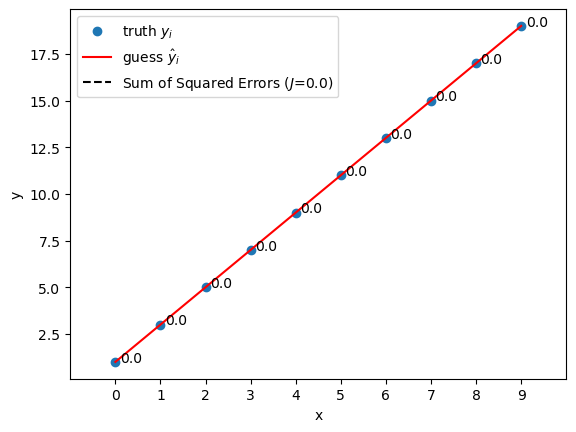

In [169]:
y_hat = X @ w

plot_model(x, y, y_hat)

Also, let's take a look at our RMSE (should be 0 since the SSE is also 0):

In [170]:
rmse(y, y_hat)

np.float64(1.4199496293978213e-30)

As expected it is effectively 0 (within machine precision).

Well-known libraries such as numpy or scikit-learn (and the FORTRAN LAPACK linear algebra library which they use under the hood), do not use the Normal Equation for solving this problem however. This has to do with numerical instability, which we'll explore next.

### Numerical Stability of the Normal Equation

Let's add another feature to our example feature matrix $\mathbf{X}$:

In [171]:
X_new = np.column_stack([X, X[:, -1]])
X_new

array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 2., 2.],
       [1., 3., 3.],
       [1., 4., 4.],
       [1., 5., 5.],
       [1., 6., 6.],
       [1., 7., 7.],
       [1., 8., 8.],
       [1., 9., 9.]])

This new feature is actually exactly the same as the second column. This is called **collinearity**.

Our equation now looks follows:

$$
y = w_0 + w_1 x_1 + w_2 x_2
$$

Remember our solution vector $y$ was created using the equation:

$$
y = 1 + 2 x_1
$$

Therefore, after introducing this new dimension, we expect the following solution:
$$
w_0=1, \quad w_1=2, \quad w_2=0
$$

If we try to use the normal equation with $\mathbf{X}$ as-is, we get an error saying that our matrix is **singular**:

In [172]:
w = w_normal_equation(X_new, y)

LinAlgError: Singular matrix

In the Normal Equation, we are calculating the inverse $(\mathbf{X}^T \mathbf{X})^{-1}$. However, matrices are not always invertible. 

A matrix has to be square to be invertible, and this condition is always satisfied in the Normal Equation because $\mathbf{X}^T \mathbf{X}$ is square by definition (even if $\mathbf{X}$ is not). 

Secondly, for a square matrix be invertible, it must be of **full rank**. This means that its columns and rows must be linearly independent. If a square matrix is not full-rank, it is said to be **rank-deficient** or **singular**, meaning it does not have an inverse. 

In our case, the matrix $\mathbf{X}$ has this problem. The third column we added to it is a duplicate of the second column making them linearly dependent. As a result $\mathbf{X}^T \mathbf{X}$ becomes rank-deficient and uninvertible.

Let's circumvent this by adding a very small number to the first element in the third column. Doing this, will make the columns linearly independent (but barely so).

In [160]:
X_new[-1, -1] += 1e-5
X_new

array([[1.     , 0.     , 0.     ],
       [1.     , 1.     , 1.     ],
       [1.     , 2.     , 2.     ],
       [1.     , 3.     , 3.     ],
       [1.     , 4.     , 4.     ],
       [1.     , 5.     , 5.     ],
       [1.     , 6.     , 6.     ],
       [1.     , 7.     , 7.     ],
       [1.     , 8.     , 8.     ],
       [1.     , 9.     , 9.10001]])

The feature matrix is no longer exactly singular and therefore becomes numerically invertible.

Looking at our Gram Matrix ($\mathbf{X}^T \mathbf{X}$) we see that columns 2 and 3 are slightly different.

In [161]:
X_new.T @ X_new

array([[ 10.      ,  45.      ,  45.10001 ],
       [ 45.      , 285.      , 285.90009 ],
       [ 45.10001 , 285.90009 , 286.810182]])

Let's calculate the inverse of the Gram Matrix:

In [162]:
np.linalg.inv(X_new.T @ X_new)

array([[   0.37777778,   -2.28866669,    2.22200002],
       [  -2.28866669,  154.43039349, -153.58047681],
       [   2.22200002, -153.58047681,  152.7472268 ]])

Here we see some values that are off the charts. If we now use this to calculate the weights, we find:

In [163]:
np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y

array([ 1.00000000e+00,  2.00000000e+00, -2.95585778e-12])

This solution actually is not that bad. $w_0$ is close to 1, $w_1$ is close to 2, and $w_3$ is close to 0. Same as before. So what's the problem then?

Remember that $y$ is an exact linear combination of the columns of $x$. We used a linear relationship to come up with $y$ based on $x$. In reality however, this is never the case. To make this example more realistic and demonstrate the problem with numerical instability, we will add some noise to $y$:

In [164]:
noise =  np.random.normal(0, 0.1, y.shape[0])
y_noisy = y + noise
y_noisy

array([ 1.07356416,  3.18529149,  5.17495795,  6.99417972,  9.1178997 ,
       11.03591629, 12.94655486, 14.90256588, 16.83248139, 18.74557633])

Now let's try to find the weights $w$ with the Normal Equation:

In [165]:
w_noisy_unstable = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y_noisy
w_noisy_unstable

array([ 1.17777311,  2.94337707, -0.98050336])

These weights are very different from what we found before. If we were to solve the Normal Equation for 2 dimensions (i.e. without linearly dependent columns) and $y_{noisy}$, we can see that the weights are actually quite close to the noiseless case:

In [173]:
w_noisy_stable = np.linalg.inv(X.T @ X) @ X.T @ y_noisy
w_noisy_stable

array([1.1920364 , 1.95752497])

So our unstable solution is giving us a solution which does not match with the ground truth. This problem of *linearly dependent features* or *multicollinearity* is common in Machine Learning. Let's look at a way to deal with this.

### Regularization

**Regularization** is a technique to make our numerical system stable. The idea is that we don't want just any weights that will give us a solution. We want to constrain the weights to remain small. What we can do is we can add a small number to the diagonal of the Gram matrix:

In [179]:
r = 1e-10
XTX_regularized = X_new.T @ X_new + r * np.eye(X_new.T.shape[0])

Let's check the inverse:

In [180]:
np.linalg.inv(XTX_regularized)

array([[ 3.45454545e-01, -2.72786458e-02, -2.72677951e-02],
       [-2.72727273e-02,  5.00062139e+09, -5.00062139e+09],
       [-2.72727273e-02, -5.00062139e+09,  5.00062139e+09]])

The numbers are quite big, let's update the regularization parameter:

In [181]:
r = 1
XTX_regularized = X_new.T @ X_new + r * np.eye(X_new.T.shape[0])
np.linalg.inv(XTX_regularized)

array([[ 0.25593904, -0.02017033, -0.02017033],
       [-0.02017033,  0.50246526, -0.49753474],
       [-0.02017033, -0.49753474,  0.50246526]])

The reason why adding a small number to the diagonal works, is because it reduces the linear dependency between the columns.

In [182]:
np.linalg.inv(XTX_regularized) @ X_new.T @ y_noisy

array([0.92643167, 0.99798044, 0.99798044])

We can update the Normal Equation with this regularization term:

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y} 
$$

This is essentially the same as adding a penalty to the magnitude of the weights. This form of regression is called **Ridge Regression** or **L2 regularization**.

We have made our numerical system more stable by constraining the weights. But note that we are not close to ground truth. There are other regularization techniques (e.g. **Lasso Regression**/**L1 regularization**) to discard certain features completely (which would be necessary in this case since we started off with 2 columns, not 3).